### **Time Series forecasting using Tensorflow**

In [1]:
# DL needs
import tensorflow as tf
import keras as kr

# Data needs
import pandas as pd
from sklearn.model_selection import train_test_split

# Numerical computation needs
import numpy as np

# plotting needs
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ensuring reproducibility
random_seed=42
tf.random.set_seed(random_seed)

import sys
sys.path.append('/home/rudraksha14/Desktop/RAY_RISE_ABOVE_YOURSELF/Programming/tensorflow/')

import important_functionalities as impf
import time_series_functionalities as tsf

2025-03-30 13:43:30.512022: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
### RESULTS:
baseline_results = {'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.5165248,
 'mase': 0.99957}

model_1_results = {'mae': 568.06366,
 'mse': 1159591.9,
 'rmse': 1076.8435,
 'mape': 2.5265791,
 'mase': 0.9979305}

model_2_results = {'mae': 597.3115,
 'mse': 1246714.0,
 'rmse': 1116.5635,
 'mape': 2.696134,
 'mase': 1.0441062}

model_3_results = {'mae': 1272.8289,
 'mse': 5554035.5,
 'rmse': 2356.7002,
 'mape': 5.8320484,
 'mase': 2.2649276}

model_4_results = {'mae': 566.3369,
 'mse': 1167021.1,
 'rmse': 1080.2875,
 'mape': 2.5285356,
 'mase': 0.99489707}

model_5_results = {'mae': 567.6664,
 'mse': 1167780.1,
 'rmse': 1080.6388,
 'mape': 2.5524669,
 'mase': 0.9972326}

model_6_results = {'mae': 564.60266,
 'mse': 1159175.1,
 'rmse': 1076.6499,
 'mape': 2.5315979,
 'mase': 0.9918505}

model_7_results = {'mae': 584.861,
 'mse': 1223363.5,
 'rmse': 1106.0576,
 'mape': 2.6246307,
 'mase': 1.0274389}

model_8_mean_results = {'mae': 564.2059,
 'mse': 1138732.8,
 'rmse': 1067.1143,
 'mape': 2.5661576,
 'mase': 0.9911534}


model_8_median_results = {'mae': 565.84155,
 'mse': 1140681.2,
 'rmse': 1068.0269,
 'mape': 2.5704112,
 'mase': 0.9940269}

model_10_results = {'mae': 643.42175,
 'mse': 4859547.0,
 'rmse': 2204.438,
 'mape': 21.448458,
 'mase': 0.9956973}

**31. Black Swan Theory - The turkey 🦃 problem (Model 10) (same as model 1) (horizon = 1, window = 7)**
<br><br><br>
🔑 RESOURCE: The Black Swan: The impact of the Highly Improbable by Nassim Nicholas Taleb

* One single datapoint, can disrupt entire historical dataset, you can have a thousand good days, until one day thousand and one is a bad one
* The turkey problem could be both deterimental as well benefitial

In [16]:
data = pd.read_csv('bitcoin_data.csv', parse_dates=['Date'], index_col=['Date'])
# parse the date column and tell pandas column 1 is date-time

In [17]:
# reduce the data to only have date and closing price of bit-coin
bitcoin_prices = pd.DataFrame(data["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [18]:
# Let's introduce a turkey problem to our BTC data (price of BTC falls 100x in one day)
btc_price_turkey = bitcoin_prices['Price'].to_numpy().copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100
btc_price_turkey[-1]

431.44471290860304

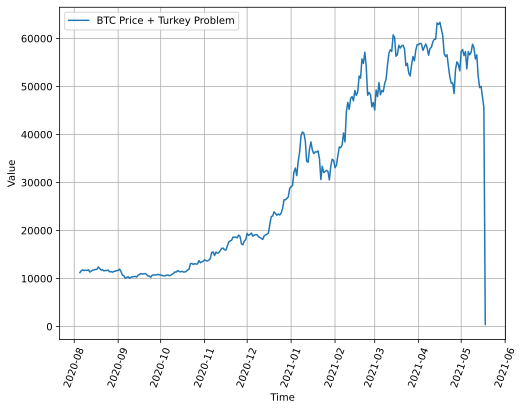

In [19]:
# plotting the turkey problem introduced
timesteps = bitcoin_prices.index.to_numpy()
plt.figure(figsize=(8,6))
tsf.plot_time_series(timesteps=timesteps,
                     values = btc_price_turkey,
                     format = '-',
                     label ='BTC Price + Turkey Problem',
                     start = 2500,
                     xtick_rotation=70
                     )
plt.show()

In [20]:
# create train and test sets for turkey problem data
HORIZON = 1
WINDOW_SIZE = 7

full_windows,full_labels =tsf.make_windows(btc_price_turkey,window_size=WINDOW_SIZE,horizon=HORIZON)

X_train, X_test, y_train, y_test = tsf.make_train_test_splits(full_windows,full_labels)
len(X_train),len(X_test),len(y_train),len(y_test)

(2224, 556, 2224, 556)

In [21]:
# create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name,savepath='model_experiments'):
    return tf.keras.callbacks.ModelCheckpoint(filepath=f'{savepath}/{model_name}.keras',
                                              verbose = 0,
                                              monitor='val_loss',
                                              save_best_only = True
                                              )

In [26]:
# 1. model creation
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(HORIZON,activation='linear')
], name='model_10_dense')

# 2. model compiling
model_10.compile(loss = 'mae',optimizer=tf.keras.optimizers.Adam(),
                metrics = ['mae','mse'])

# 3. fit the model
model_10.fit(x=X_train,
            y=y_train,
            epochs = 100,
            batch_size = 128,
            validation_data = (X_test,y_test),
            verbose = 1,
            callbacks=[create_model_checkpoint(model_10.name)]
            )

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2342.4775 - mae: 2342.4775 - mse: 15140457.0000 - val_loss: 2979.3799 - val_mae: 2979.3799 - val_mse: 24705920.0000
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 448.6150 - mae: 448.6150 - mse: 643697.5000 - val_loss: 1787.1544 - val_mae: 1787.1544 - val_mse: 10995512.0000
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 217.9142 - mae: 217.9142 - mse: 218750.5625 - val_loss: 1230.3550 - val_mae: 1230.3550 - val_mse: 7624982.0000
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 169.0757 - mae: 169.0757 - mse: 144006.6094 - val_loss: 949.0226 - val_mae: 949.0226 - val_mse: 6759916.5000
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 154.9540 - mae: 154.9540 - mse: 123391.6172 - val_loss: 948.5657 - val_mae: 948.5657 - val_mse: 6551241.5000
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 149.5019 - mae: 149.5019 - mse: 118729.1562 - val_loss: 913.7781 - val_mae: 913.7781 - v

In [27]:
# evaluate model 10
model_10.evaluate(X_test,y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 290.6134 - mae: 290.6134 - mse: 732704.3125


[643.421630859375, 643.421630859375, 4859547.0]

In [28]:
# load in saved best performing model_10 and evaluate it on test data
model_10 = tf.keras.models.load_model(f'model_experiments/{model_10.name}.keras')

In [29]:
# evaluate loaded model 10
model_10.evaluate(X_test,y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 290.6134 - mae: 290.6134 - mse: 732704.3125 


[643.421630859375, 643.421630859375, 4859547.0]

In [30]:
# making forcasts with the model_10 on test dataset
def make_preds(model,input_data):
    '''
    Uses model to make predictions on input data
    '''

    forcast = model.predict(input_data)
    return tf.squeeze(forcast) # return 1D array of predictions

model_10_preds=make_preds(model_10,X_test)
len(model_10_preds),model_10_preds[:10]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8865.464, 8798.129, 9050.703, 8774.826, 8740.748, 8758.819,
        8685.909, 8526.655, 8475.921, 8536.636], dtype=float32)>)

In [31]:
model_10_results = tsf.evaluate_time_series(tf.squeeze(y_test),model_10_preds)
model_10_results

{'mae': 643.42175,
 'mse': 4859547.0,
 'rmse': 2204.438,
 'mape': 21.448458,
 'mase': 0.9956973}

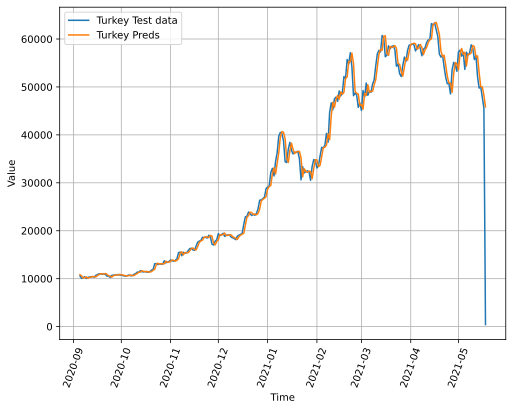

In [32]:
# viewing the model predictions

plt.figure(figsize=(8,6))
offset = 300
tsf.plot_time_series(timesteps=timesteps[-len(X_test):],
                     values = btc_price_turkey[-len(y_test):],
                     label='Turkey Test data',
                     start = offset,
                     format='-')
tsf.plot_time_series(timesteps=timesteps[-len(X_test):],
                     values = model_10_preds[-len(y_test):],
                     label='Turkey Preds',
                     start = offset,
                     format='-',xtick_rotation=70)

plt.show()

**Note:**
* Model cannot predict anything in the future, outside of the distribution of data that it was trained on.
* The events with the greatest effect, are likely completely unpredictable

***-- CONTD IN NEXT NOTEBOOK --***